In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sat Feb 27 04:30:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 44kB/s 


In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
# Import Libraries
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# My data is in google drive.
train_dir ="/content/drive/MyDrive/DATA/PlantVillage/train"
test_dir="/content/drive/MyDrive/DATA/PlantVillage/test"

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

13 Classes
18164 Train images
1956 Test images


In [ ]:
# Pre-processing data with parameters.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

In [ ]:
train_generator =train_datagen.flow_from_directory(train_dir,
                                target_size=(img_width,img_height),                                                   
                                batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(img_width,img_height),                                     
                                                batch_size=batch_size)


Found 18163 images belonging to 13 classes.
Found 1956 images belonging to 13 classes.


In [ ]:
# The name of the 13 diseases.
train_generator.class_indices

{'Potato___Early_blight': 0,
 'Potato___Late_blight': 1,
 'Potato___healthy': 2,
 'Tomato_Bacterial_spot': 3,
 'Tomato_Early_blight': 4,
 'Tomato_Late_blight': 5,
 'Tomato_Leaf_Mold': 6,
 'Tomato_Septoria_leaf_spot': 7,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 8,
 'Tomato__Target_Spot': 9,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 10,
 'Tomato__Tomato_mosaic_virus': 11,
 'Tomato_healthy': 12}

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 23104)            

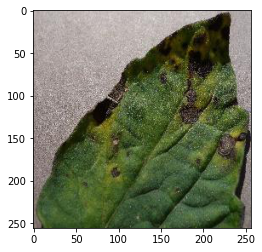

In [ ]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/DATA/PlantVillage/train/Tomato_Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG')
plt.imshow(img1);
#preprocess image
img1 = image.load_img('/content/drive/MyDrive/DATA/PlantVillage/train/Tomato_Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
validation_generator = train_datagen.flow_from_directory(
                       train_dir, # same directory as training data
                       target_size=(img_height, img_width),
                       batch_size=batch_size)
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit(train_generator,epochs=10,                            
                          steps_per_epoch=train_generator.samples//batch_size,             
                          validation_data=validation_generator,
                          validation_steps=validation_generator.samples // batch_size,verbose=1)

Found 18163 images belonging to 13 classes.
Epoch 1/10
567/567 [==============================] - 6278s 11s/step - loss: 1.7004 - accuracy: 0.4283 - val_loss: 0.7212 - val_accuracy: 0.7509
Epoch 2/10
567/567 [==============================] - 1686s 3s/step - loss: 0.6734 - accuracy: 0.7666 - val_loss: 0.3956 - val_accuracy: 0.8687
Epoch 3/10
567/567 [==============================] - 1686s 3s/step - loss: 0.4947 - accuracy: 0.8297 - val_loss: 0.4255 - val_accuracy: 0.8569
Epoch 4/10
567/567 [==============================] - 1687s 3s/step - loss: 0.4142 - accuracy: 0.8569 - val_loss: 0.3204 - val_accuracy: 0.8902
Epoch 5/10
567/567 [==============================] - 1667s 3s/step - loss: 0.3535 - accuracy: 0.8817 - val_loss: 0.3481 - val_accuracy: 0.8805
Epoch 6/10
567/567 [==============================] - 1684s 3s/step - loss: 0.2786 - accuracy: 0.9061 - val_loss: 0.1514 - val_accuracy: 0.9501
Epoch 7/10
567/567 [==============================] - 1697s 3s/step - loss: 0.2623 - accura

In [ ]:
# Save model
from keras.models import load_model
model.save('crop.h5')

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop.h5')
# Mention name of the disease into list.
Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___healthy","Tomato__Tomato_YellowLeaf__Curl_Virus"]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Tomato___Bacterial_spot


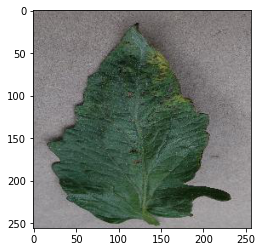

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Pre-Processing test data same as train data.
img_width=256
img_height=256
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
from keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/DATA/PlantVillage/train/Tomato_Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG')])
disease=image.load_img('/content/drive/MyDrive/DATA/PlantVillage/test/Tomato_Bacterial_spot/00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG')
plt.imshow(disease)
print (Classes[int(result)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Tomato___Septoria_leaf_spot


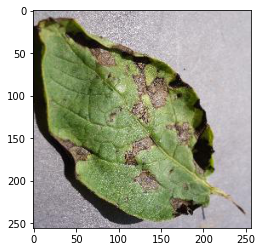

In [ ]:
result = model.predict_classes([prepare('/content/drive/MyDrive/DATA/PlantVillage/train/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')])
disease=image.load_img('/content/drive/MyDrive/DATA/PlantVillage/test/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG')
plt.imshow(disease)
print (Classes[int(result)])

In [ ]:
import matplotlib.pyplot as plt

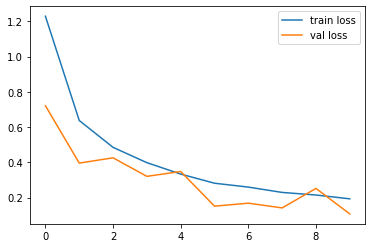

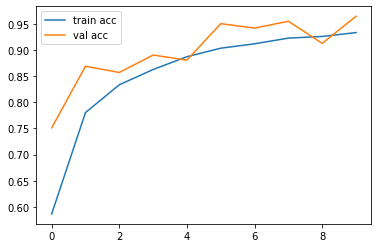

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(train.history['loss'], label='train loss')
plt.plot(train.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(train.history['accuracy'], label='train acc')
plt.plot(train.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
!pip3 install tensorflow==1.14.0 

     |████████████████████████████████| 109.3MB 101kB/s 
     |████████████████████████████████| 491kB 47.6MB/s 
     |████████████████████████████████| 51kB 9.2MB/s 
     |████████████████████████████████| 3.2MB 54.7MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
#from tensorflow.contrib import lite
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file( 'crop.h5' ) 
model = converter.convert()
file = open( 'output.tflite' , 'wb' ) 
file.write( model )

OSError: ignored